# **Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

**Created by: Febrianti** | [**LinkedIn**](https://www.linkedin.com/in/febs/)

## **I. Preparation**

### **1.1 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1.2 Load Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/MP3. Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/marketing_campaign_data.csv')

In [5]:
df.sample(5)

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
925,925,5871,1979,S2,Bertunangan,24401000.00,0,0,31-08-2012,98,73000,28000,217000,10000,24000,115000,3,6,1,6,8,0,0,0,0,0,0,3,11,0
1374,1374,4743,1969,S3,Menikah,56242000.00,0,1,03-03-2013,72,689000,8000,167000,11000,8000,88000,5,8,4,11,6,0,0,0,0,0,0,3,11,0
2070,2070,2406,1949,S1,Bertunangan,54591000.00,0,1,05-08-2013,63,376000,4000,94000,12000,9000,24000,3,6,2,8,5,0,0,0,0,0,0,3,11,0
773,773,2371,1972,S1,Menikah,33622000.00,1,1,13-04-2013,22,39000,1000,22000,3000,4000,12000,3,2,0,4,7,0,0,0,0,0,0,3,11,0
1329,1329,158,1945,S3,Bertunangan,71604000.00,0,0,17-11-2013,3,345000,53000,528000,98000,75000,97000,1,8,3,5,4,1,0,0,0,0,0,3,11,1


## **II. INFO DATASET**

In [6]:
# Check info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

**Observation Results:**
1. The data consist of 30 columns and 2240 rows
2. Feature Dt_Customer should be datetime instead of object

In [7]:
# Check Null Value
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Observation Result:**
There is a null value in the '*Income*' feature, it will be dropped because the amount is not significant.

In [8]:
# Check duplicated data
df.duplicated().any()

False

## **II. DATA PREPROCESSING I**



### **2.1 Change Data Type**

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

### **2.2 Feature Engineering**

In [10]:
# Age
df['Age'] = 2022 - df['Year_Birth']

# Age group
def age_group(x):
  if x <= 11:
    age_group = 'child'
  elif x <= 17:
    age_group = 'teens'
  elif x <= 35:
    age_group = 'young_adults'
  elif x <= 54:
    age_group = 'adults'
  else:
    age_group = 'senior'
  return age_group

df['Age_group'] = df['Age'].apply(lambda x: age_group(x))

# Children
df['Children'] = df['Kidhome'] + df['Teenhome']

# Is Parent
df['Is_parent'] = np.where(df['Children']>0,1,0)

# Member duration
df['Member_duration'] = 2022 - df['Dt_Customer'].dt.year

# Total spending
df['Total_spending'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Total transaction
df['Total_transaction'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Conversion rate
df['Conversionrate'] = df['Total_transaction'] / df['NumWebVisitsMonth']

# Accepted Campaign
df['Acc_cmp'] = df['AcceptedCmp3'] +	df['AcceptedCmp4']	+ df['AcceptedCmp5'] +	df['AcceptedCmp1'] +	df['AcceptedCmp2']

## **III. EDA**

In [11]:
# Copy the dataframe for analysis purposes
dfstat = df.copy()

# Changing some features data types for analysis purposes
to_object = ['Complain','Response','Is_parent']
dfstat[to_object] = dfstat[to_object].astype('object')

In [12]:
# Separating numeric and categorical features
nums = ['Income','Recency','NumWebVisitsMonth','Z_CostContact', 'Z_Revenue',
        'Age','Children','Member_duration','Total_spending','Total_transaction','Conversionrate','Acc_cmp']
cats = ['Education','Marital_Status','Complain','Response','Age_group','Is_parent']

### **3.1 Univariate Analysis**

#### **3.1.1 Univariate Analysis - Numeric**

In [13]:
dfstat[nums].describe()

,Income,Recency,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Age,Children,Member_duration,Total_spending,Total_transaction,Conversionrate,Acc_cmp
count,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2238.00,2240.00
mean,52247251.35,49.11,5.32,3.00,11.00,53.19,0.95,8.97,605798.21,14.86,inf,0.30
std,25173076.66,28.96,2.43,0.00,0.00,11.98,0.75,0.68,602249.29,7.68,NaN,0.68
min,1730000.00,0.00,0.00,3.00,11.00,26.00,0.00,8.00,5000.00,0.00,0.00,0.00
25%,35303000.00,24.00,3.00,3.00,11.00,45.00,0.00,9.00,68750.00,8.00,1.25,0.00
50%,51381500.00,49.00,6.00,3.00,11.00,52.00,1.00,9.00,396000.00,15.00,2.67,0.00
75%,68522000.00,74.00,7.00,3.00,11.00,63.00,1.00,9.00,1045500.00,21.00,5.50,0.00
max,666666000.00,99.00,20.00,3.00,11.00,129.00,3.00,10.00,2525000.00,44.00,inf,4.00


**Result Observations:**
1. 'Z_CostContact' and 'Z_Revenue' have only one value so we will drop these features;
2. The maximum value in the 'Age' feature is 129, which seems to be an outlier, this needs to be explored further.
3. The maximum value in the 'Income' feature is 666666000, which seems to be an outlier, this needs to be explored further.
4. There are NaN and inf values in Conversionrate.
5. Most customers didn't accept the campaigns seen from 75% of the data on Acc_cmp has a value of 0.

In [14]:
# Update nums without Z_CostContact and Z_Revenue
nums = ['Income','Recency','NumWebVisitsMonth','Age','Children','Member_duration',
        'Total_spending','Total_transaction','Acc_cmp','Conversionrate']

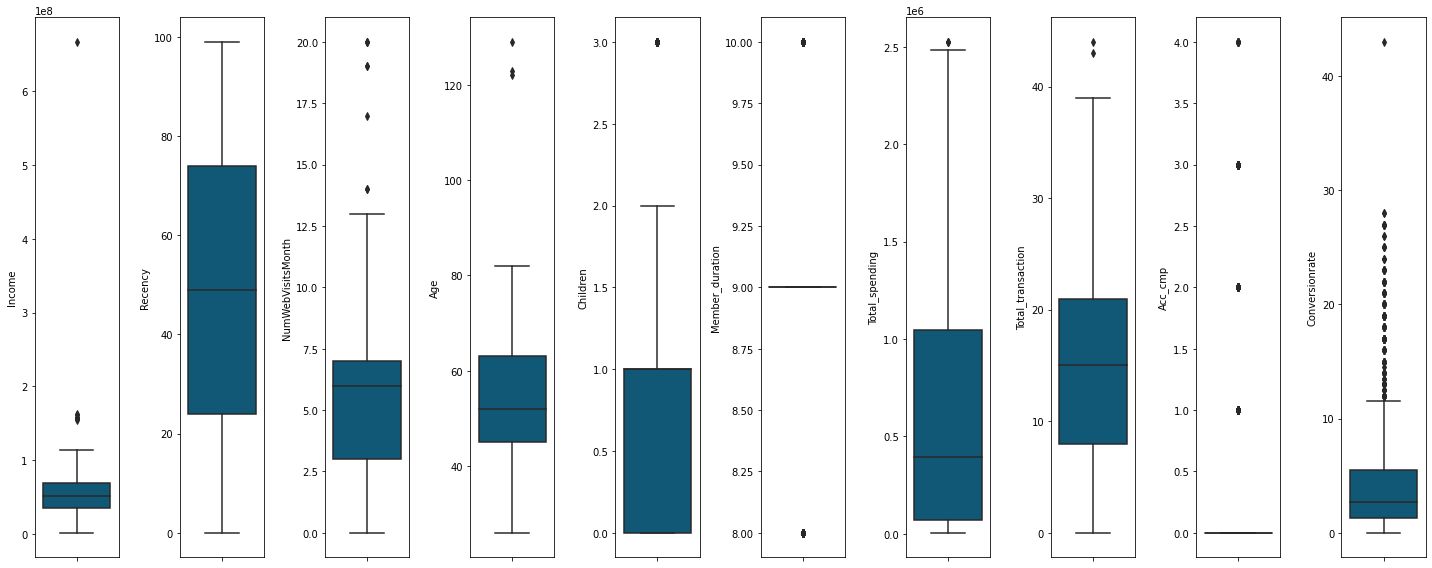

In [15]:
# Boxplot
plt.figure(figsize=(20,8))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='#005f87', orient='v')
    plt.tight_layout()

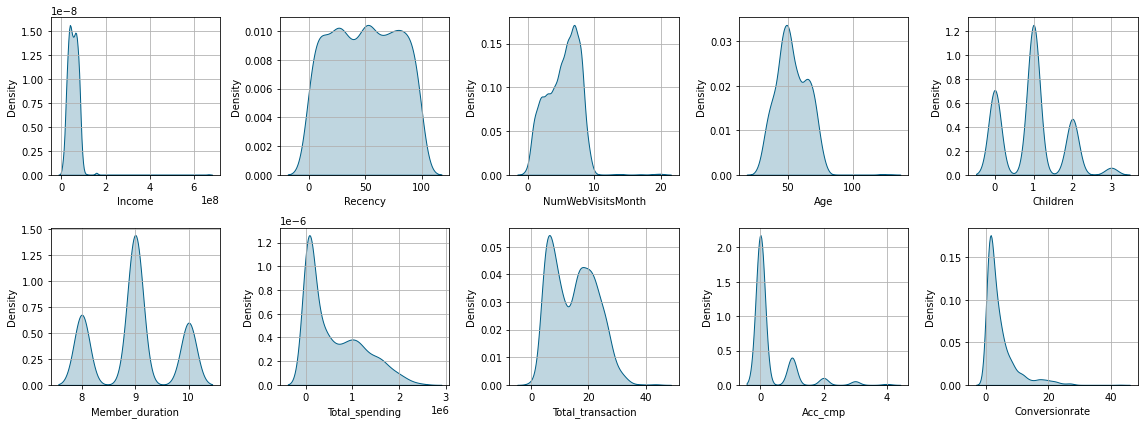

In [16]:
# Distribution plot
plt.figure(figsize=(16,6))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.kdeplot(x=dfstat[nums[i]], color='#005f87',shade=True)
    plt.xlabel(nums[i])
    plt.grid()
    plt.tight_layout()

**Observation Results:**
Income, NumWebVisitMonth, Age, Total_spending, Acc_cmp, and Conversionrate looks positively skewed and have an outlier.

#### **3.1.2 Univariate Analysis - Categoric**

In [17]:
dfstat[cats].describe()

,Education,Marital_Status,Complain,Response,Age_group,Is_parent
count,2240,2240,2240,2240,2240,2240
unique,5,6,2,2,3,2
top,S1,Menikah,0,0,adults,1
freq,1127,864,2219,1906,1139,1602


**Observation Result:** Most of our customers have a 'S1' educational background and are married adults.

In [18]:
for cat in cats:
  print(f'Value counts: {cat}')
  print(dfstat[cat].value_counts())
  print()

Value counts: Education
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value counts: Marital_Status
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value counts: Complain
0    2219
1      21
Name: Complain, dtype: int64

Value counts: Response
0    1906
1     334
Name: Response, dtype: int64

Value counts: Age_group
adults          1139
senior           954
young_adults     147
Name: Age_group, dtype: int64

Value counts: Is_parent
1    1602
0     638
Name: Is_parent, dtype: int64



**Obesrvation Results:**
The value of 'Janda' and 'Duda' in Marital_Status will be replaced by 'Cerai' because they have the same meaning.

In [19]:
# Replace value 'Janda' and 'Duda' to 'Cerai'
df['Marital_Status'] = df['Marital_Status'].replace(['Janda','Duda'],'Cerai')
dfstat['Marital_Status'] = dfstat['Marital_Status'].replace(['Janda','Duda'],'Cerai')

### **3.2 Bivariate & Multivariate Analysis**

#### **3.2.1 Bivariate Analysis - Numeric**

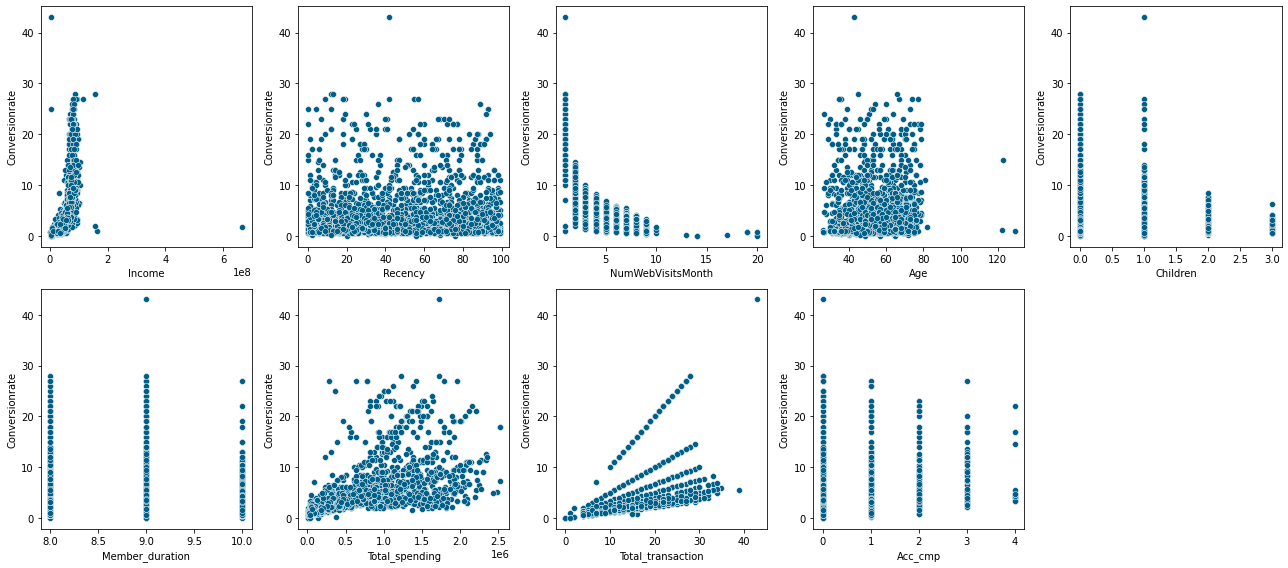

In [20]:
nums2 = ['Income','Recency','NumWebVisitsMonth','Age','Children','Member_duration',
        'Total_spending','Total_transaction','Acc_cmp']

# Scatterplot
plt.figure(figsize=(18,8))
for i in range(0,len(nums2)):
  plt.subplot(2,5,i+1)
  sns.scatterplot(x=nums2[i], y='Conversionrate', color='#005f87', data=dfstat)
  plt.tight_layout()

**Observation Results:**
<div align='justify'>

1. Features 'Income', 'Total_spending' have a positive correlation with 'Conversionrate', This makes sense because the higher the income, the more money they can spend and the total spending will also be greater;

2. The correlation between 'Conversionrate' and 'Age' variabel is less significant because the conversion rate distribution in age variable tend to be average.

#### **3.2.2 Multivariate Analysis - Numeric**

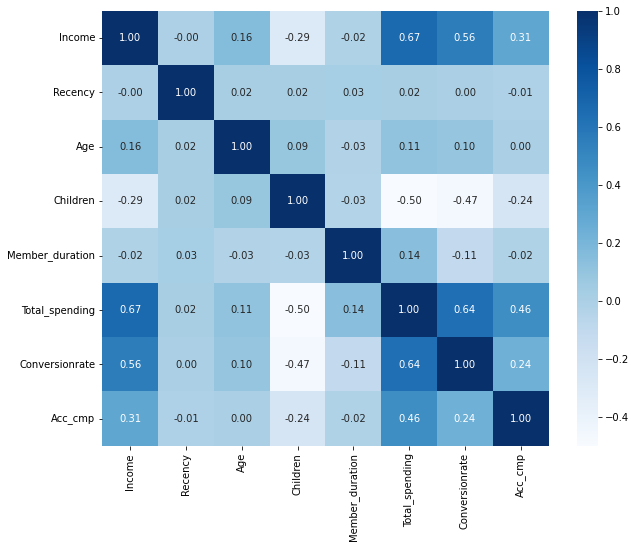

In [21]:
# Heatmap
nums3 = ['Income','Recency','Age','Children','Member_duration',
        'Total_spending','Conversionrate','Acc_cmp']
        
plt.figure(figsize=(10,8))
sns.heatmap(dfstat[nums3].corr(), cmap='Blues', annot=True, fmt='.2f');

**Observation Results:**
<div align='justify'>

There is a strong positive correlation between 'Conversionrate' with 'Income' and Total_spending, while 'Age' is not that significant. In addition, there is a fairly strong negative correlation between 'Conversionrate' and 'Children'. When someone has more children, it means they will have more dependents so there will be fewer transactions which will result in a lower conversion rate.


#### **3.2.3 Bivariate Analysis - Categoric**

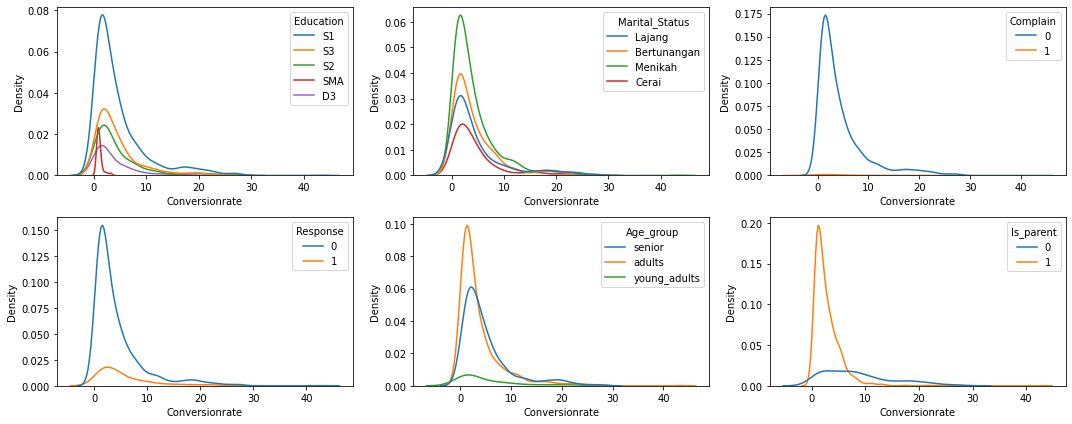

In [21]:
plt.figure(figsize=(15,6))
for i in range(0,len(cats)):
  plt.subplot(2,3,i+1)
  sns.kdeplot(x='Conversionrate', hue=cats[i], data=dfstat)
  plt.tight_layout()

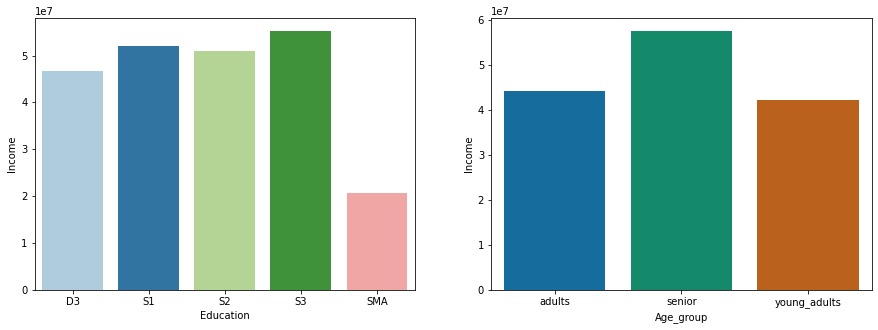

In [25]:
# Look at the relationship between Income with Education and Age_group
dfg1 = df.groupby('Education').agg({'Income':'median'}).reset_index()
dfg2 = df.groupby('Age_group').agg({'Income':'median'}).reset_index()


fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x='Education', y='Income', data=dfg1, ax=ax[0], palette='Paired')
sns.barplot(x='Age_group', y='Income', data=dfg2, ax=ax[1]);

**Obsevation Results:**
1. Customers with a 'SMA' educational background have a lower conversion rate, someone with a low educational background has a lower income, this causes them to have limitations in transactions so that the conversion rate is lower;
2. Seniors tend to have higher conversion rates. The same thing with seniors, this is also related to income because seniors have the highest income so they have more money to make transactions. 

## **IV. DATA PREPROCESSING II**

### **4.1 Handle Null Values**

In [26]:
isnull = df.isnull().sum()
isnull[isnull.values > 0]

Income            24
Conversionrate     2
dtype: int64

In [27]:
# because the number is minor, the null value will be dropped
df.dropna(subset=['Income','Conversionrate'], inplace=True)

### **4.2 Feature Selection**

**Drop columns that are no longer needed:**
1. Unnamed: 0 and ID as they are both primary keys.
2. Year_Birth is replaced by Age.
3. Dt_Customer is replaced by Member_duration.
4. Z_Revenue and Z_CostContact because they only have one value.

In [28]:
df.drop(['Unnamed: 0','ID','Year_Birth','Dt_Customer','Z_Revenue','Z_CostContact'],axis=1,inplace=True)

### **4.3 Handle Outlier**

In [29]:
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Total_spending','Income','Age','Total_transaction']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df = df[filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 2214
Jumlah baris setelah memfilter outlier: 2198


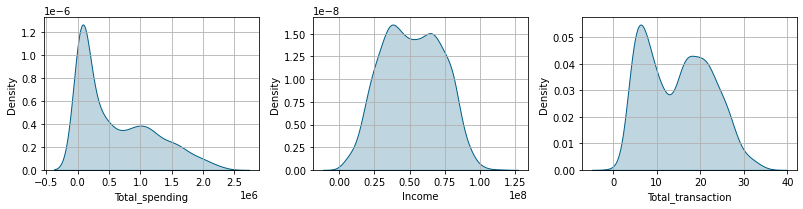

In [30]:
plt.figure(figsize=(15,8))
feat = ['Total_spending','Income','Total_transaction']
for i in range(0, len(feat)):
    plt.subplot(3, 4, i+1)
    sns.kdeplot(x=df[feat[i]], color='#005f87',shade=True)
    plt.xlabel(feat[i])
    plt.grid()
    plt.tight_layout()

<div align = 'justify'>

**Observation Result:** after handling outlier, Income and Total_transaction features is close to normal distribution while Total_spending is still skew, feature transformation is needed to handle this before doing K-means clustering, features with normal distribution are needed so that the centroid position of each cluster is not biased.

In [31]:
# keep the original dataframe for further analysis
df_ori = df.copy()

### **4.4 Feature Transformation**

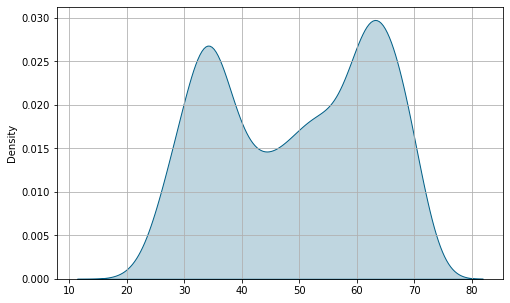

In [32]:
# Look at the data distribution of total spending and conversion rate when the transformation feature is performed (Box-Cox)
plt.figure(figsize=(8,5))
sns.kdeplot(st.boxcox(df['Total_spending'])[0], color='#005f87', shade=True)
plt.grid();

# The distribution is closer to normal

In [33]:
# Adding new features as a result of the transformation
df['Total_spending_bc'] = st.boxcox(df['Total_spending'])[0]

# Drop features that have been replaced 
df.drop(['Total_spending'], axis=1, inplace=True)

### **4.5 Standardization**

in modeling I will use the RFM (Recency, Frequency, Monetary) method, but instead of using recency I will replace it with income because income has a stronger relationship with conversion rate than recency.

In [34]:
from sklearn.preprocessing import StandardScaler

feat = ['Income','Total_transaction','Total_spending_bc']

df_scaled = df.copy()
ss = StandardScaler()
for col in feat:
  df_scaled[col] = ss.fit_transform(df_scaled[[col]])

In [35]:
df_scaled[feat].describe()

,Income,Total_transaction,Total_spending_bc
count,2198.00,2198.00,2198.00
mean,-0.00,0.00,-0.00
std,1.00,1.00,1.00
min,-2.41,-1.96,-2.11
25%,-0.79,-0.90,-0.98
50%,-0.02,0.02,0.13
75%,0.80,0.81,0.92
max,3.01,2.66,1.69


## **V. MODELING**

### **5.1 Find The Optimal Number of Clusters**

In [36]:
from sklearn.cluster import KMeans

# The features selected for modeling are those that have a strong correlation with conversionrate
col_model = ['Income','Total_transaction','Total_spending_bc']

df_mod = df_scaled[col_model].copy()
inertia = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i, random_state=42).fit(df_mod)
  inertia.append(kmeans.inertia_) 

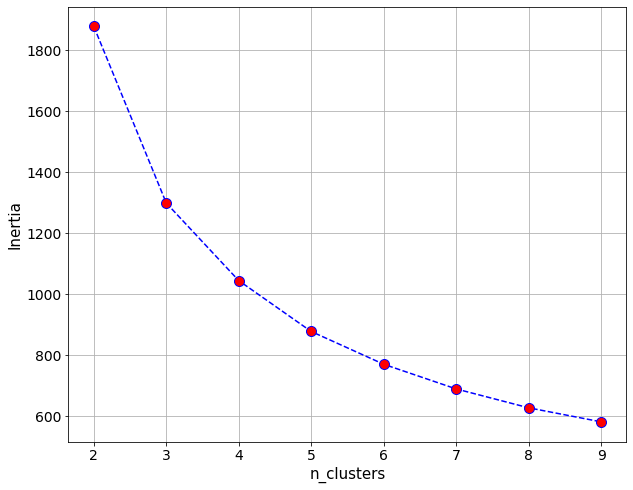

In [37]:
# Plot inertia
plt.figure(figsize=(10,8))

plt.plot(range(2,10), inertia, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.grid()
plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('n_clusters', fontsize=15)
plt.ylabel('Inertia', fontsize=15);
plt.savefig('/content/drive/MyDrive/MP3. Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/Fig1.png', dpi=200);

**Obsevation Results:**
Seen from the graph above, the optimal number of clusters is 3.

### **5.2 Evaluation Using Silhouette Score**

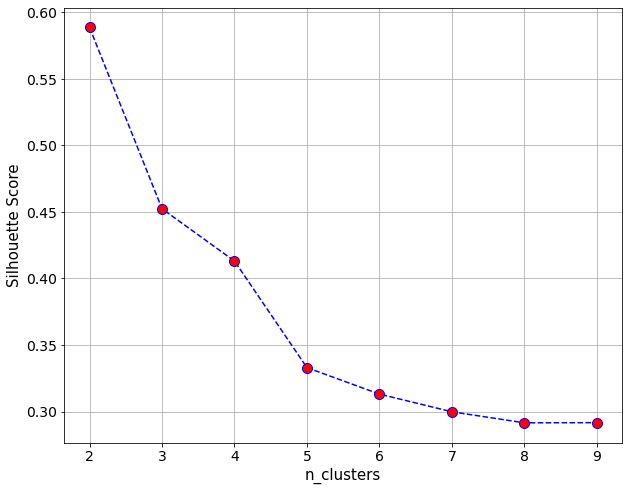

In [38]:
from sklearn.metrics import silhouette_score

silhouette_score_euclidean = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i).fit(df_mod)
    preds = kmeans.predict(df_mod)
     
    score_euclidean = silhouette_score(df_mod, preds, metric='euclidean')
    silhouette_score_euclidean.append(score_euclidean)

plt.figure(figsize=(10,8))
plt.plot(range(2,10), silhouette_score_euclidean, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.grid()

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('n_clusters', fontsize=15)
plt.ylabel('Silhouette Score', fontsize=15);
# plt.savefig('/content/drive/MyDrive/MP3. Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/Fig2.png', dpi=200);

### **5.3 Cluster Visualization**

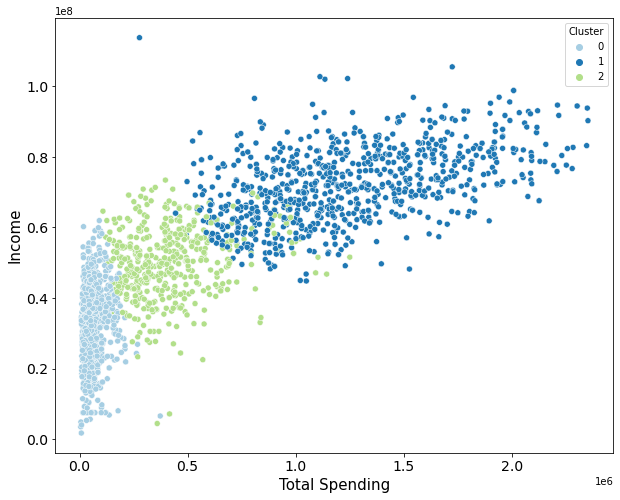

In [40]:
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_mod)

df_mod['Cluster'] = kmeans.labels_
df_ori['Cluster'] = kmeans.labels_

# Cluster visualization
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_ori, x='Total_spending', y='Income', hue='Cluster', palette='Paired')

plt.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Total Spending', fontsize=15)
plt.ylabel('Income', fontsize=15);
# plt.savefig('/content/drive/MyDrive/MP3. Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning/Fig3.png', dpi=200);

## **VI. CLUSTER INTERPRETATION**

### **5.1 Cluster Identification Based on Income and Total Spending**

In [42]:
# Look at the statistical data on total spending and income for each cluster
df_ori.groupby('Cluster')['Income','Total_spending'].agg(['count','mean','median']).reset_index()

<ipython-input-42-1267f971aa01>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ori.groupby('Cluster')['Income','Total_spending'].agg(['count','mean','median']).reset_index()


Cluster Income                         Total_spending                      
           count        mean      median          count       mean     median
0       0    845 31720995.27 31859000.00            845   64886.39   54000.00
1       1    858 72061669.00 71833000.00            858 1239963.87 1178500.00
2       2    495 49919187.88 50200000.00            495  412145.45  393000.00

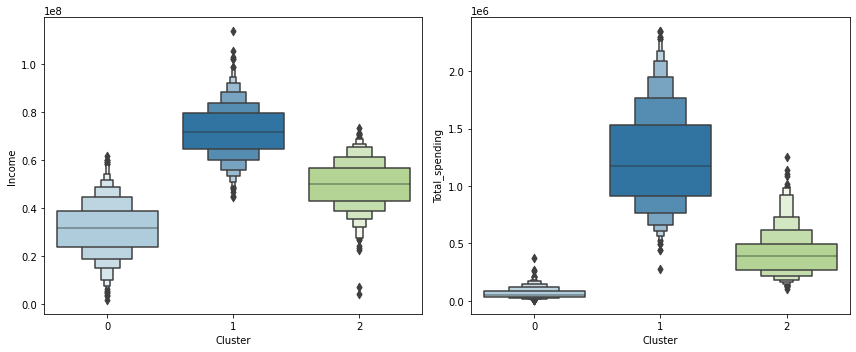

In [45]:
# Visualization
cluster_cats=['Income','Total_spending']

plt.figure(figsize=(12, 5))
for i in range(0, len(cluster_cats)):
    plt.subplot(1, 2, i+1)
    sns.boxenplot(x='Cluster', y=cluster_cats[i], data=df_ori, palette='Paired')
    plt.xlabel('Cluster')
    plt.tight_layout()

**Cluster Identification:**
1. **Cluster 0**
 - Consists of 845, the number of customers is the second largest
 - This cluster has lowest income and lowest total spending with a median value of IDR 54.000
 - Cluster 0 is categorized as **Low Spender**
2.  **Cluster 1**
 - Consists of 858 customers, they are the most customers
 - This cluster has the highest income and also the highest total spending with a median of IDR 1.178.500
 - Cluster is categorized as **High Spender**
3. **Cluster 2**
 - Consist of 495, they are the least
 - This cluster has moderate income and total spending with a median value of IDR 393.000
 - Cluster 1 is categorized as **Mid Spender**

In [43]:
# Perform label encoding of clusters to make it easier to interpret
map_cluster = {
    0 : 'Low Spender',
    1 : 'High Spender',
    2 : 'Mid Spender'
    }

df_ori['Cluster_mapped'] = df_ori['Cluster'].map(map_cluster)

### **5.2 Customer profile based on clusters**

#### **5.2.1 Customer based on Children, Age, and Education**

In [47]:
display(df_ori.groupby('Cluster_mapped')['Children'].describe())

,count,mean,std,min,25%,50%,75%,max
Cluster_mapped,,,,,,,,
High Spender,858.00,0.56,0.65,0.00,0.00,0.00,1.00,3.00
Low Spender,845.00,1.24,0.71,0.00,1.00,1.00,2.00,3.00
Mid Spender,495.00,1.13,0.68,0.00,1.00,1.00,2.00,3.00


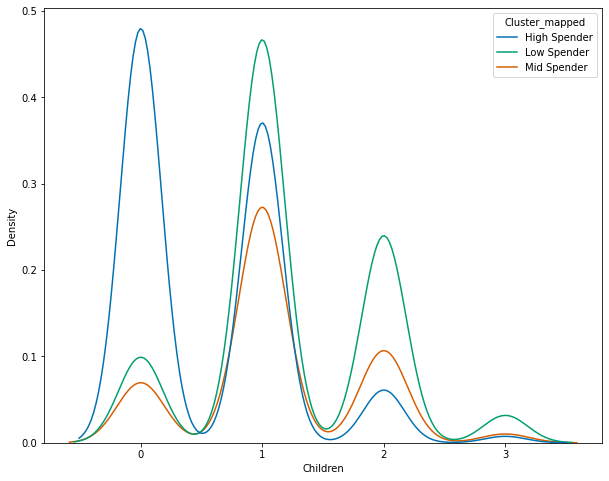

In [51]:
plt.figure(figsize=(10,8))
sns.kdeplot(x='Children',hue='Cluster_mapped',data=df_ori);

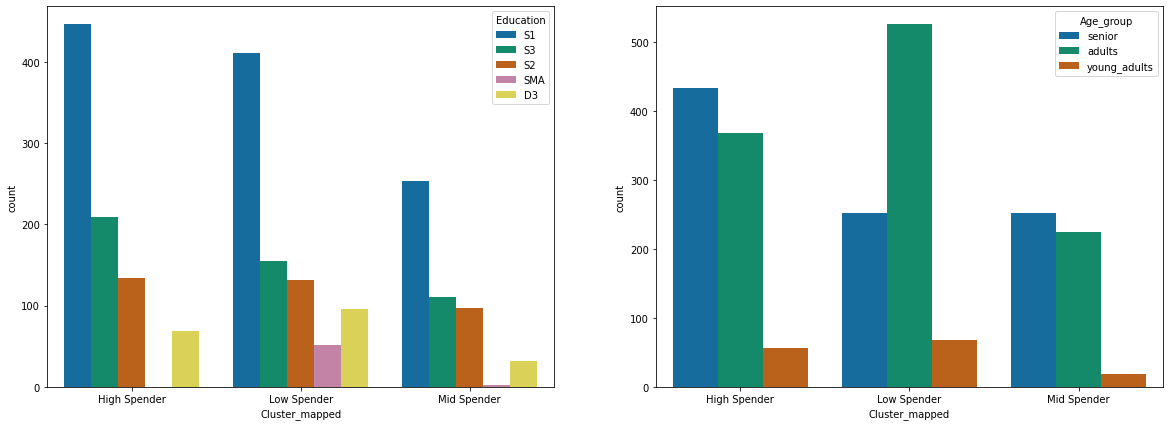

In [52]:
fig, ax = plt.subplots(1,2,figsize=(20,7))
sns.countplot(x='Cluster_mapped', hue='Education', data=df_ori, ax=ax[0])

sns.countplot(x='Cluster_mapped', hue='Age_group', data=df_ori, ax=ax[1]);

**Observation Results:**

**High spender:**
1. Most of the members of this cluster do not have children.
2. Most of them are seniors (> 54 years).
3. Members of this cluster have a minimum education of D3.

**Mid spender:**
1. Most of them have 1 child.
2. Most of them are also seniors.
3. There are members whose educational background is SMA but the number is not significant.


**Low spender:**
1. Many of them have 1 child.
2. This cluster has the most members with SMA backgrounds among other clusters.
3. Most of them are classified as adults (36-54 years).

#### **5.2.2 Customers based on Number Web Visit per Month**

In [53]:
df_ori.groupby('Cluster_mapped')['NumWebVisitsMonth'].agg(['median','max']).reset_index()

,Cluster_mapped,median,max
0,High Spender,3.00,9
1,Low Spender,7.00,20
2,Mid Spender,6.00,10


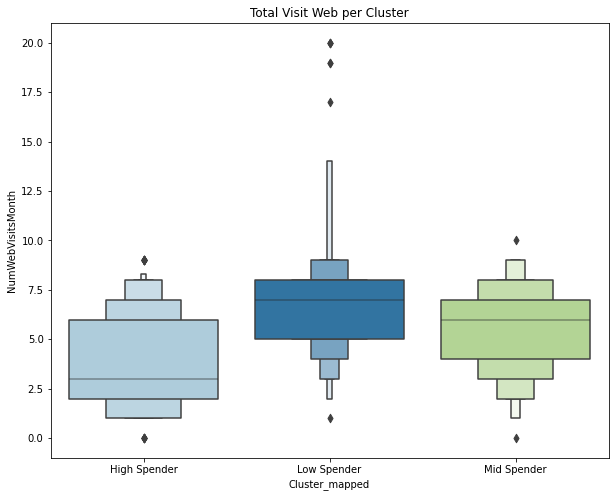

In [54]:
plt.figure(figsize=(10,8))
sns.boxenplot(x='Cluster_mapped', y='NumWebVisitsMonth', data=df_ori, palette='Paired')
plt.title('Total Visit Web per Cluster');

**Observation Result:**
The low spender category has the highest total number of web visits, which is an average of 7 times per month with a maximum total of 20 visits. The mid spender category has 6 web visits per month, while high spenders have the lowest amount which is an average of 3 times per month.

#### **5.2.3 Customer based on Purchasing history**

In [55]:
df_ori.groupby('Cluster_mapped')['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].median()

<ipython-input-55-b4b670a3d6f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ori.groupby('Cluster_mapped')['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'].median()


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Cluster_mapped,,,,
High Spender,1.00,6.00,5.00,9.00
Low Spender,2.00,2.00,0.00,3.00
Mid Spender,3.00,5.00,2.00,5.00


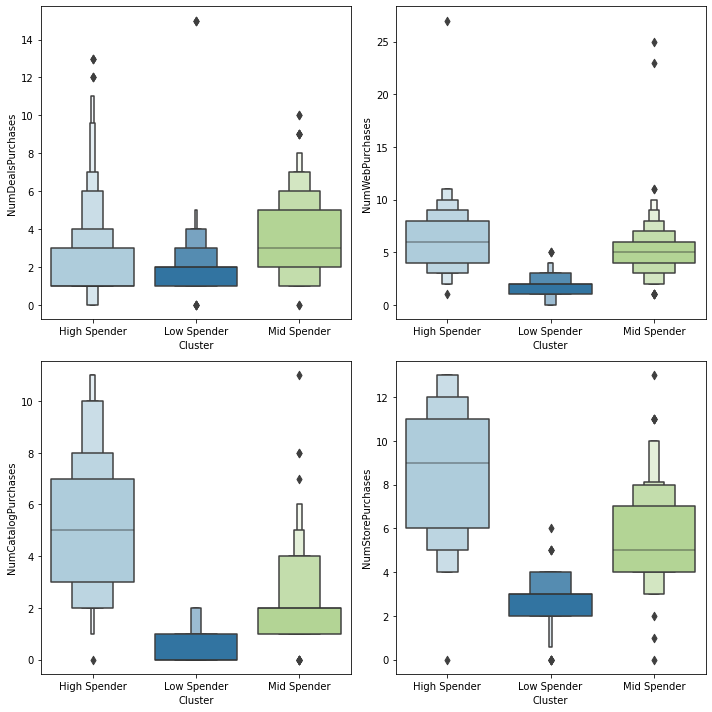

In [56]:
#boxenplot

purchase_cats=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.figure(figsize=(10, 10))
for i in range(0, len(purchase_cats)):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(x='Cluster_mapped', y=purchase_cats[i], data=df_ori, palette='Paired')
    plt.xlabel('Cluster')
    plt.tight_layout()

**Observation Results:**
- Mid spender is highest deals user and approximately used promo for 3 times per month.
- High spender is the one who purchases the most on the web, which is 6 times a month.
- Purchases through catalogs are the lowest for low spender 0 and for mid spender 2 times per month.
- Purchases at the store are the highest compared to other purchases.

#### **5.2.4 Customers based on Accepted Campaign**

In [57]:
dfg = df_ori.groupby(['Cluster_mapped','Acc_cmp']).Cluster_mapped.count().reset_index(name='Total')
dfg['pct'] = dfg['Total']/dfg.groupby('Cluster_mapped').Total.transform('sum')*100
dfg

,Cluster_mapped,Acc_cmp,Total,pct
0,High Spender,0,544,63.40
1,High Spender,1,187,21.79
2,High Spender,2,74,8.62
3,High Spender,3,42,4.90
4,High Spender,4,11,1.28
5,Low Spender,0,780,92.31
6,Low Spender,1,63,7.46
7,Low Spender,2,2,0.24
8,Mid Spender,0,420,84.85
9,Mid Spender,1,70,14.14


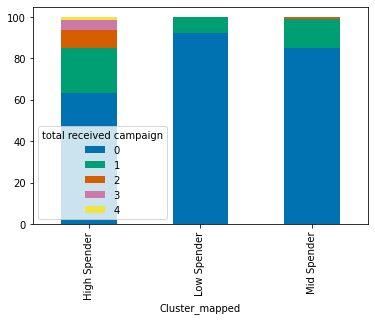

In [64]:
df_bar = dfg.pivot_table(index='Cluster_mapped', columns='Acc_cmp',
                           values='pct')

df_bar.plot(kind = 'bar', stacked=True)
plt.legend(title='total received campaign');

**Observation Results:**
Around 47% of high spender customers receive campaigns 1-4 times, more than 90% of low spender customers have never received campaigns and around 15% of medium spender customers receive campaigns but are limited to 1-2 campaigns.

#### **5.2.5 Customers based on Total Spending per Product**

In [65]:
df_ori.groupby('Cluster_mapped')['MntCoke', 'MntMeatProducts', 'MntFishProducts','MntGoldProds',
       'MntSweetProducts', 'MntFruits'].median().reset_index()

<ipython-input-65-39828a921136>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_ori.groupby('Cluster_mapped')['MntCoke', 'MntMeatProducts', 'MntFishProducts','MntGoldProds',


,Cluster_mapped,MntCoke,MntMeatProducts,MntFishProducts,MntGoldProds,MntSweetProducts,MntFruits
0,High Spender,574500.00,301500.00,59000.00,54000.00,38000.00,36500.00
1,Low Spender,15000.00,12000.00,3000.00,8000.00,2000.00,2000.00
2,Mid Spender,189000.00,70000.00,11000.00,30000.00,8000.00,7000.00


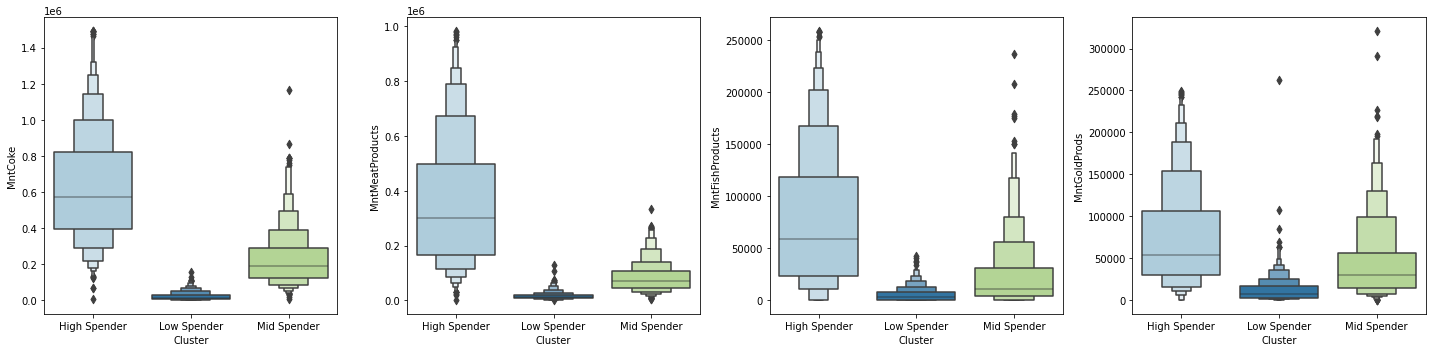

In [73]:
#boxplot

Mnt=['MntCoke',	'MntMeatProducts',	'MntFishProducts',	'MntGoldProds',	'MntSweetProducts',	'MntFruits']
plt.figure(figsize=(20, 5))
for i in range(0, len(purchase_cats)):
    plt.subplot(1, 4, i+1)
    sns.boxenplot(x='Cluster_mapped', y=Mnt[i], data=df_ori, palette='Paired')
    plt.xlabel('Cluster')
    plt.tight_layout()

**Observation Results:**
Customers in all clusters spend the most money on coke and meat products while sweet products and fruit are the least amount.


The following is the order of favorite products for each cluster:

1. High spender = coke, meat, fish, golds, sweet, fruit
2. Mid spender = coke, meat, fish, gold, sweet, fruit
3. Low spender = coke, meat, gold, fish, sweet & fruit

### **5.3 Profiling Customers & Summarizing Report**

**Low Spender:**
1. Have the lowest rate of income and total spending.
2. Most of the customers in this cluster are adults (36-53 years old), have 1 kids, and have the most members with SMA backgrounds among other clusters.
3. Visit the web most often, an average of 7 times per month but have the least amount of purchase by web (2 times).
4. Most of the customer are not accepting any campaign
5. Using deals promo at least 2 times per month


**Mid Spender:**
1. Mid spender are the fewest and has moderate income and total spending.
2. Most of the customers are senior (>54 years old) and have 1 kids.
3. They visit the website more often than high spenders (10 times a month) and make purchases through the website an average of 5 times.
4. Mid spender is highest deals user and approximately used promo for 3 times per month.

**High Spender:**
1. High spenders are the most customers and most valuable customers for a company.
2. Have the highest rate of income and total spending.
3. Most of the customers are senior (> 54 years) who do not have children.
4. They visited the web the least (9 times) and made purchases on the web 6 times, they were the most frequently purchased in stores.
5. 47% of them have at least received 1 campaign.

### **5.4 Business Recommendation**

<div align='justify'>

1. Identify why low spender category have low purchase on the web even though they have the highest number of web visits. This could probably happened because of uncomplete product category, unsuitable product price, high shipping cost, high service cost, or poor website quality.

2. Develop features in web purchase to increase the number of web visits especially for mid and high spender who have a low number of web visits. Recommended features:
 - Clicked ads to increase the number of web visits
 - Product recommendation
 - Coupon or voucher to customers especially for mid spender category who have high number of deals purchased.

3. Launched a membership program with 3 levels based on clusters (Gold = High spender, Silver = Mid spender, Bronze = Low Spender) with different benefits at each level. The higher the level, the more profit, with this target the customer can make transactions more often to reach the highest level.

4. Sell bundling for products that are most in demand with those that are least in demand such as coke with sweet products so that sales of sweet products can increase.

5. The number of low spenders is quite a lot, but they have small income, we need to create personalized ads, promotions or campaigns with products that are cheap/have low prices via web that can attract these clusters to shop on our platform.

### **5.5 Potensial Impact**

In [76]:
pi = df_ori.groupby('Cluster_mapped')['Total_spending'].sum().reset_index()
pi

,Cluster_mapped,Total_spending
0,High Spender,1063889000
1,Low Spender,54829000
2,Mid Spender,204012000


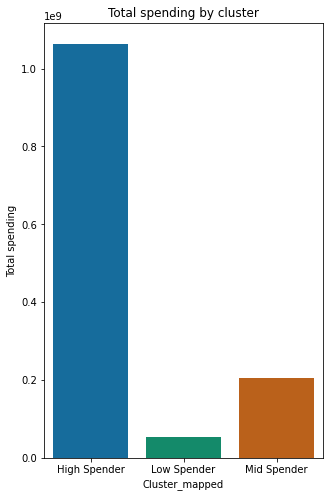

In [77]:
# Visualization
plt.figure(figsize=(5,8))
sns.barplot(x='Cluster_mapped', y='Total_spending', data=pi)
plt.title('Total spending by cluster')
plt.ylabel('Total spending');

Based on the analysis, market retargeting is focused on the high spender and mid spender categories which have high income amounts that have the potential to make more purchases compared to the low spender category.

- High spenders have a potential GMV of IDR 1.063.889.000
- Medium buyers have a potential GMV of IDR 204.012.000